In [65]:
%matplotlib inline

from numpy import linspace, abs, log10
from scipy.fftpack import fftfreq, fftshift
import matplotlib.pyplot as plt
import peakutils
import pandas
from IPython.display import display, Audio

SAMPLING_RATE = 100000

In [72]:
# Plot FFT frequency domain
def plot_output(fft_output, thres=0.95, logscale=False):
    plt.figure(figsize=(8, 4), dpi=80)
    fft_output = fftshift(fft_output)
#    freq = linspace(0, SAMPLING_RATE/2.0, len(fft_output))
    freq = fftshift(fftfreq(len(fft_output), 1/SAMPLING_RATE))

    if logscale:
        plt.plot(freq, 10 * log10(fft_output))
        plt.ylabel("Magnitude(dB)")
    else:
        plt.plot(freq, fft_output)
        plt.ylabel("Magnitude")
    plt.xlabel("Frequency(Hz)")
    plt.title("Frequency domain")

    print("Frequencies at peaks: {} Hz".format(freq[peakutils.indexes(fft_output, thres=thres)]))

Frequencies at peaks: [195.3125] Hz


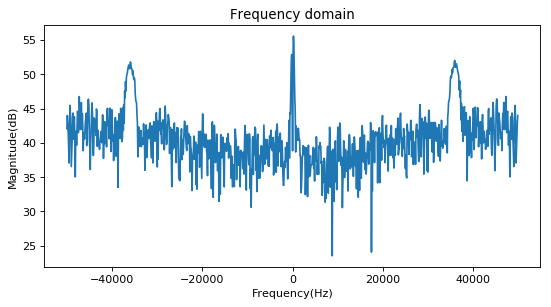

In [86]:
df = pandas.read_csv("./out.fft")
#df.head()
plot_output(df['Magnitude'], logscale=True)